# Notebook 2 - IGTI - Módulo 1 - Headbrain
- Autor: Caio Gabriel de Moraes
- Data : 22/05/2020
- LinkedIn: https://www.linkedin.com/in/caio-moraes-8026a6158/

## Carregando as Bibliotecas

In [1]:
# import de avisos
import sys
import warnings
import matplotlib.cbook
warnings.simplefilter("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# import para manipulação dos dados
import pandas as pd
import numpy as np
import scipy

# import para a visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# import para a otimização dos MSE
from scipy.optimize import curve_fit

# import para o modelo de regressão linear
from sklearn.linear_model import LinearRegression

# import para as metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# import para os nós que devem ser executados interativamente
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# declarando o tamanho máximo das linhas e colunas
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [2]:
# versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Notebook 1 - Módulo 1 - Caio Moraes" --iversions

seaborn    0.10.1
scipy      1.4.1
matplotlib 3.2.0
pandas     1.0.3
numpy      1.18.1
Notebook 1 - Módulo 1 - Caio Moraes


## Criando as Funções

In [3]:
# função para verificar se existe valores faltantes
def check_missing(df, display=10):
    temp_df = df.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    df_missing = pd.DataFrame({"Missing n": temp_df.isnull().sum(), "% Missing": df_nan})
    if df_missing["Missing n"].sum() == 0:
        return print("Não existe valores faltantes neste dataset!")
    else:
        return df_missing.sort_values("% Missing", ascending=False).head(display)


# função para ver os valores distintos
def unique_values(df):
    print("-" * 40)
    for c in df.columns:
        print("Coluna: {0}".format(c))
        print()
        print("Valores Únicos:")
        print(df[c].unique())
        print()
        print("Quantidade: {0}".format(df[c].nunique()))
        print()
        print("Menor Valor: {0}".format(min(df[c])))
        print("Maior Valor: {0}".format(max(df[c])))
        print("-" * 40)

## Preparando o Modelo

In [5]:
# definindo as variáveis
idade = [18, 25, 57, 45, 26, 64, 37, 40, 24, 33]  # variável de entrada (independente)
salario_anual = [15000, 29000, 68000, 52000, 32000, 80000, 41000, 45000, 26000, 33000]  # variável de saída (dependente)

# transformando a lista em array
X = np.array(idade)
y = np.array(salario_anual)

### Observações
- Preparamos o modelo para a aplicação da regressão linear
- Defimos as variáveis do nosso modelo
- A variável de entrada X é a idade
- A variável de saída y é o salario_anual
- Transformamos as listas em arrays

## Aplicando a Regressão Linear

**Manual**

In [6]:
# define a função a ser otimizada (regressão simples)
def equacao_linear(x, a, b):
    return a * x + b

In [7]:
# gera os parâmetros iniciais para o otimizador
parametros_iniciais = np.array([1.0, 1.0])

In [8]:
# realiza a otimização através do erro médio quadrado (MSE)
parametros_otimizados, pcov = curve_fit(equacao_linear, X, y, parametros_iniciais)
# parametrosOtimizados - contém os parâmetros de ajuste da curva
# pcov - contém a covariância dos parâmteros encontrados

In [9]:
# realiza a previsão dos dados através do modelo (constroi a equação linear)
previsao_manual = equacao_linear(X, *parametros_otimizados)  # utiliza a função linear com os parâmetros otimizados

In [10]:
# encontra o erro absoluto (linhas verticais)
erro_absoluto = previsao_manual - y

In [11]:
# calcula o erro quadrado entre cada medida
SE = np.square(erro_absoluto)
# calcula o MSE
MSE = np.mean(SE)

print("SE: {0}".format(SE))
print("MSE: {0}".format(MSE))

SE: [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE: 5479238.909036714


In [12]:
# realiza o cálculo do coeficiente de determinação
rsquared = 1.0 - (np.var(erro_absoluto) / np.var(y))  # numpy.var - encontra a variância entre os dados do vetor

# mostrando o coeficiente de determinação
print("Coeficiente de Determinação: {0}".format(rsquared))

Coeficiente de Determinação: 0.9846300347582353


In [13]:
# mostra os parâmetros encontrados
print("Y = {0}X {1}".format(parametros_otimizados[0], parametros_otimizados[1]))

Y = 1320.5325666669085X -6627.651716729711


Text(0.5, 0, 'Idade')

Text(0, 0.5, 'Salário Anual (R$)')

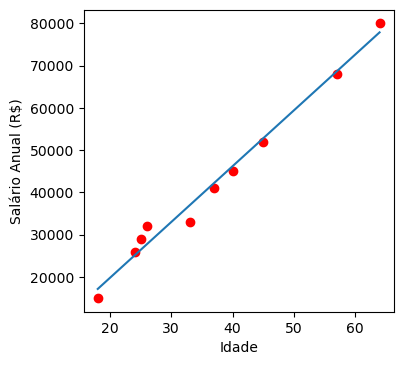

In [14]:
# realiza o plot da figura
f = plt.figure(figsize=(4, 4), dpi=100)  # indica o tamanho da figura
axes = f.add_subplot(111)  # cria os objetos para o subplot

# frealiza o plot dos dados (pontos no gráfico)
axes.plot(X, y, 'ro')

# cria os dados para serem utilizados na construção da linha (equação) 
xModel = np.linspace(min(X), max(X))  # encontra os valores maximos e mínimos da "linha"
yModel = equacao_linear(xModel, *parametros_otimizados)  # aplica a função com os parâmetros obtidos

# realiza o plot da "linha"
axes.plot(xModel, yModel)
plt.xlabel("Idade")
plt.ylabel("Salário Anual (R$)")

**Sklearn**

In [15]:
# cria o objeto do modelo de regressão
reg = LinearRegression()

# passando o reshape no X
X_reshaped = X.reshape((-1, 1))  # na regressão linear é necessário que o X seja 2D

# treinando o modelo
reg.fit(X_reshaped, y)

# realizando a previsão
y_pred = reg.predict(X_reshaped)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# parâmetros encontrados
print("Y = {0}X {1}".format(reg.coef_, reg.intercept_))

Y = [1320.53256496]X -6627.651646877632


In [17]:
# criando as métricas
mean_abs = mean_absolute_error(y, y_pred)  # erro médio absoluto
mean_squ = mean_squared_error(y, y_pred)  # erro médio quadrático
median_abs = median_absolute_error(y, y_pred)  # erro mediano absoluto
coef_r2 = r2_score(y, y_pred)  # coeficiente de determinação (R2)

In [18]:
# mostrando as métricas
print("Mean Abs Error:    {0}".format(round(mean_abs, 4)))
print("Mean Squ Error:    {0}".format(round(mean_squ, 4)))
print("Median Abs Error:  {0}".format(round(median_abs, 4)))
print("Coef Determin R2:  {0}".format(round(coef_r2, 4)))
print("Coef Angular:     {0}".format(reg.coef_))
print("Coef Linear:      {0}".format(reg.intercept_))

Mean Abs Error:    1991.316
Mean Squ Error:    5479238.909
Median Abs Error:  1672.8104
Coef Determin R2:  0.9846
Coef Angular:     [1320.53256496]
Coef Linear:      -6627.651646877632


<Figure size 400x400 with 0 Axes>

Text(0.5, 0, 'Peso Declarado')

Text(0, 0.5, 'Peso Real')

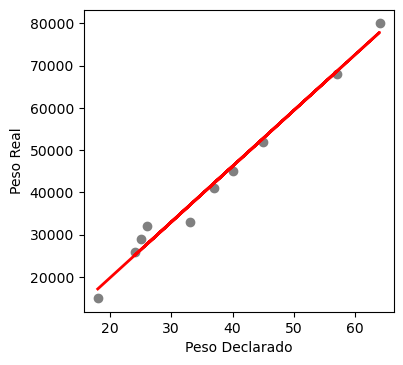

In [19]:
# plotando o gráfico
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(X_reshaped, y, color='gray')  # realiza o plot do gráfico de dispersão
plt.plot(X_reshaped, y_pred, color='red', linewidth=2)  # realiza o plot da linha
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show()

### Observação
Aplicamos 2 tipos de regressão linear:


**1) Manual**
    - Definimos a função a ser otimizada
    - Definimos os parâmetros iniciais
    - Realizamos a otimização através do MSE
    - Realizamos a previsão dos dados
    - Encontramos o erro absoluto, erro quadrático, o MSE e o coeficiente de determinação(R2)
    - Mostramos os parâmetros otimizados encontrados
    - Plotamos do gráfico
    
**2) Sklearn**
    - Criamos o objeto do modelo de regressão
    - Passamos o X para 2D (reshape)
    - Treinamos o modelo
    - Realizamos a previsão
    - Mostramos os parâmetros otimizados encontrados (coef_, intercept_)
    - Criamos e mostramos as métricas de avaliação
        * Mean Abs Error:    1991.316
        * Mean Squ Error:    5479238.909
        * Median Abs Error:  1672.8104
        * Coef Determin R2:  0.9846
        * Coef Angular:     [1320.53256496]
        * Coef Linear:      -6627.651646877632
    - Plotamos o gráfico
    

Foram criados as duas maneiras para fins didáticos, mas podemos perceber que com o Sklearn simplifica bastante, tanto no entendimento quanto na criação, então aconselhavel o uso do sklearn.

## Aplicando a Regressão Linear em um Dataset

### Trabalhando com o dataset

In [20]:
# carregando o dataset
df_headbrain = pd.read_csv('headbrain.csv')

In [21]:
# mostrando o dataset
df_headbrain.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [22]:
# mostrando a dimensão do dataser
df_headbrain.shape

(237, 4)

In [23]:
# mostrando as informações do dataset
df_headbrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [24]:
# mostrando os valores únicos
unique_values(df_headbrain)

----------------------------------------
Coluna: Gender

Valores Únicos:
[1 2]

Quantidade: 2

Menor Valor: 1
Maior Valor: 2
----------------------------------------
Coluna: Age Range

Valores Únicos:
[1 2]

Quantidade: 2

Menor Valor: 1
Maior Valor: 2
----------------------------------------
Coluna: Head Size(cm^3)

Valores Únicos:
[4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 3443 3993 3640 4208
 3832 3876 3497 3466 3095 4424 3878 4046 3804 3710 4747 4423 4036 4022
 3454 4175 3787 3796 4103 4161 4158 3814 3527 3748 3334 3492 3962 3505
 4315 3863 4034 4308 3165 3641 3644 3891 3793 4270 4063 4012 3458 3890
 4166 3935 3669 3866 3393 4442 4253 3727 3329 3415 3372 4430 4381 4008
 3858 4121 4057 3824 3394 3558 3362 3930 3835 3830 3856 3249 3577 3933
 3850 3309 3406 3506 3907 4160 3318 3662 3899 3700 3779 3473 3490 3654
 3478 3495 3834 3661 3618 3648 4032 3399 3916 3695 3524 3571 3594 3383
 3499 3589 3900 4114 3937 4200 4488 3614 4051 3782 3391 3124 4053 3582
 3666 3532 3667 2857 3436 

### Observação
- Utlizamos o dataset headbrain
- São 237 e 4 features diferentes todas são do tipo int64:
    - Gender == Genêro: (1 / 2)
    - Age Range == Faixa Etária: (1 / 2)
    - Head Size(cm^3) == Tamanho da Cabeça: (221 valores diferentes do 2720 até 4747)
    - Brain Weight(grams): Peso do Cérebro: (146 pesos diferente do 955 até 1635)

### Análise Exploratória dos Dados

In [25]:
# mosftrando a descrição do dataset
df_headbrain.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


- count = número de elementos (linhas) existente no banco de dados
- mean = média dos valores na coluna
- std = desvio padrão dos dados presentes na coluna
- min = menor valor existente na coluna
- 25% = primeiro quartil dos dados (25%)
- 50% = segundo quartil dos dados (50%)
- 75% = terceiro quartil dos dados (75%)
- max = valor máximo existente na coluna

In [26]:
# verificando se existe valores nulos
check_missing(df_headbrain)

Não existe valores faltantes neste dataset!


### Verificando Anomalias

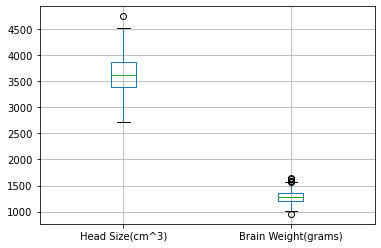

In [27]:
# constroi o boxplot para as colunas desejadas
colunas = ["Head Size(cm^3)", "Brain Weight(grams)"]
df_headbrain.boxplot(column=colunas)

In [28]:
# Z-score para a feature Head Size(cm^3)
z = np.abs(scipy.stats.zscore(df_headbrain["Head Size(cm^3)"].values))
threshold = 2
result = np.where(z > threshold)
df_headbrain_outlier = df_headbrain.iloc[result[0]]

# mostrando o dataset com anômalias(outliers)
df_headbrain_outlier

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
19,1,1,4424,1400
24,1,1,4747,1635
25,1,1,4423,1505
62,1,2,4442,1330
68,1,2,4430,1510
69,1,2,4381,1415
109,1,2,4430,1620
122,1,2,4488,1440
134,2,1,2857,1027


In [29]:
# mostrando a quantidade de outliers para a feature Head Size(cm^3)
print(len(df_headbrain_outlier))

13


In [30]:
# Z-score para a feature Brain Weight(grams)
z = np.abs(scipy.stats.zscore(df_headbrain["Brain Weight(grams)"].values))
threshold = 2
result = np.where(z > threshold)
df_headbrain_outlier = df_headbrain.iloc[result[0]]

# mostrando o dataset com anômalias(outliers)
df_headbrain_outlier

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
4,1,1,4177,1590
24,1,1,4747,1635
42,1,1,4315,1525
43,1,1,3804,1570
57,1,2,4166,1560
102,1,2,3876,1588
109,1,2,4430,1620
134,2,1,2857,1027
187,2,2,3069,1022


In [31]:
# mostrando a quantidade de outliers para a feature Brain Weight(grams)
print(len(df_headbrain_outlier))

12


In [32]:
# Z-score para as duas features
z = np.abs(scipy.stats.zscore(df_headbrain[colunas].values))
threshold = 2
result = np.where(z > threshold)
df_headbrain_outlier = df_headbrain.iloc[result[0]]

# mostrando o dataset com anômalias(outliers)
df_headbrain_outlier

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
0,1,1,4512,1530
4,1,1,4177,1590
19,1,1,4424,1400
24,1,1,4747,1635
24,1,1,4747,1635
25,1,1,4423,1505
42,1,1,4315,1525
43,1,1,3804,1570
57,1,2,4166,1560


In [33]:
df_headbrain_outlier.index.unique()

Int64Index([  0,   4,  19,  24,  25,  42,  43,  57,  62,  68,  69, 102, 109,
            122, 134, 187, 195, 209, 221],
           dtype='int64')

### Observações
- Não temos valores faltantes no dataset
- Temos 12 anomalias (outliers) para a feature Head Size(cm^3)
- Temos 13 anomalias (outliers) para a feature Brain Weight(grams)
- Temos 19 anomalias (outliers) ao total do dataset 
- Índices das anomalias: (0, 4, 19, 24, 25, 42, 43, 57, 62, 68, 69, 102, 109, 122, 134, 187, 195, 209, 221)
- Alguns registros se repetem nas duas features (0, 24, 109, 134, 209, 221)

### Explorando os Dados

Text(0.5, 1.0, 'Distribuição dos clientes quanto ao gênero')

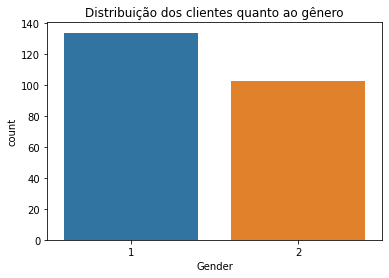

In [34]:
# analisando a distribuição dos clientes por gênero
sns.countplot(x="Gender", data=df_headbrain)
plt.title("Distribuição dos clientes quanto ao gênero")

In [35]:
# verificando a quantidade de valores da coluna genêro
df_headbrain["Gender"].value_counts()

1    134
2    103
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Distribuição dos clientes quanto ao gênero')

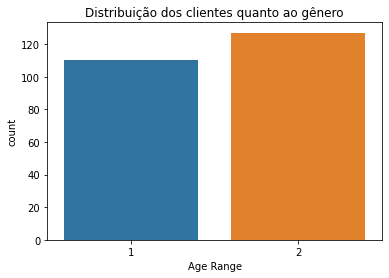

In [36]:
# analisando a distribuição dos clientes por faixa etária
sns.countplot(x="Age Range", data=df_headbrain)
plt.title("Distribuição dos clientes quanto ao gênero")

In [37]:
# verificando a quantidade de valores da coluna genêro
df_headbrain["Age Range"].value_counts()

2    127
1    110
Name: Age Range, dtype: int64

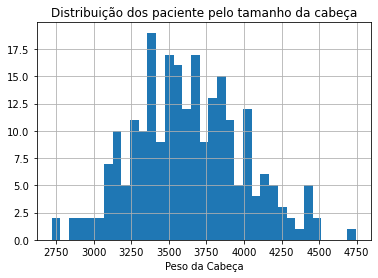

In [38]:
# analisando a distribuição dos pacientes quanto tamanho da cabeça através do histograma
df_headbrain.hist("Head Size(cm^3)", bins=35)  # seleciona a feature Head Size(cm^3)
# "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title("Distribuição dos paciente pelo tamanho da cabeça");  # adiciona o título ao gráfico (histograma)
plt.xlabel("Peso da Cabeça");

In [39]:
# verificando a quantidade de valores da feature Head Size(cm^3)
df_headbrain["Head Size(cm^3)"].value_counts()

3394    3
3399    2
3899    2
3165    2
3804    2
3876    2
3391    2
3479    2
4430    2
3156    2
3497    2
3571    2
3318    2
3779    2
4046    2
4253    1
2720    1
3233    1
3748    1
3071    1
3228    1
3738    1
4270    1
3735    1
3930    1
3218    1
3727    1
3214    1
3354    1
3724    1
4747    1
3716    1
3203    1
4114    1
3777    1
3248    1
4315    1
3834    1
3832    1
3824    1
3309    1
2939    1
3302    1
4261    1
3297    1
3493    1
3803    1
3292    1
2773    1
3249    1
4308    1
3793    1
3279    1
3277    1
3787    1
3785    1
3782    1
3269    1
3268    1
3267    1
3710    1
4166    1
3700    1
3707    1
3647    1
3644    1
3642    1
3641    1
3640    1
4051    1
3124    1
3344    1
3632    1
3609    1
3618    1
3104    1
3615    1
3614    1
3613    1
3175    1
4121    1
3095    1
3090    1
3284    1
3082    1
4103    1
3589    1
3835    1
4158    1
3648    1
3704    1
4161    1
3703    1
3329    1
4208    1
3695    1
3181    1
3692    1
3689    1
4200    1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1B832A780>]],
      dtype=object)

Text(0.5, 1.0, 'Distribuição dos pacientes pelo peso do cérebro')

Text(0.5, 0, 'Peso do Cérebro')

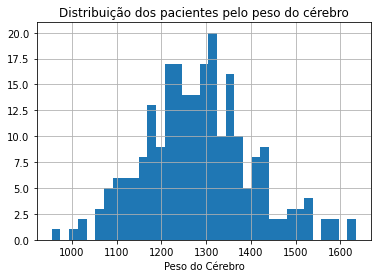

In [40]:
# analisando a distribuição dos pacientes quanto peso do cérebro através do histograma
df_headbrain.hist("Brain Weight(grams)", bins=35)  # seleciona a feature Brain Weight(grams)
# "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title("Distribuição dos pacientes pelo peso do cérebro") # adiciona o título ao gráfico (histograma)
plt.xlabel("Peso do Cérebro")

In [41]:
# verificando a quantidade de valores da feature Brain Weight(grams)
df_headbrain["Brain Weight(grams)"].value_counts()

1350    8
1250    6
1290    6
1280    5
1270    5
1220    5
1310    5
1300    5
1180    4
1340    4
1240    4
1380    4
1175    3
1165    3
1405    3
1235    3
1320    3
1120    3
1225    3
1400    3
1335    3
1355    3
1432    3
1440    2
1415    2
1210    2
1170    2
1275    2
1215    2
1430    2
1330    2
1192    2
1243    2
1485    2
1127    2
1252    2
1130    2
1060    2
1306    2
1375    2
1390    2
1260    2
1245    2
1076    1
1095    1
1100    1
1357    1
1635    1
1358    1
1370    1
1103    1
1360    1
1105    1
1362    1
1364    1
1374    1
1373    1
1110    1
1295    1
1346    1
1282    1
1297    1
1090    1
1302    1
1560    1
1292    1
1305    1
1309    1
1322    1
1311    1
1312    1
1570    1
1287    1
1315    1
1316    1
1318    1
1321    1
1620    1
1125    1
1070    1
1075    1
1588    1
1590    1
1296    1
1080    1
1027    1
1324    1
1279    1
1104    1
1241    1
1208    1
955     1
1468    1
1470    1
1218    1
1222    1
1224    1
1226    1
1230    1
1490    1


### Observações
- Temos mais pacientes do genêro 1 do que do genêro 2:
    - 134 Genêro 1 (56 %)
    - 103 Genêro 2 (44 %)
- Temos mais paciente da faixa etária 2 do que da faixa etária 1:
    - 110 Faixa Etária 1 (53 %)
    - 127 Faixa Etária 2 (47 %)
- Temos mais pacientes com o tamanho da cabeça de 3394
- E menos pacientes com o tamanho da cabeça na faixa de 2800 e 4500
- Temos mais pacientes com o peso do cérebro de 1350
- Temos menos pacientes com o peso do cérebro na faixá de 900 e 1200

### Aplicando a Regressão Linear

In [42]:
# definindo as variáveis
X = df_headbrain["Head Size(cm^3)"].values
y = df_headbrain["Brain Weight(grams)"].values
# como o formato dos dados em cada uma das colunas do dataframe são séries é necessário converter array

In [43]:
# criando o objeto do modelo de regressao
reg = LinearRegression()

# passando o reshape no x
X_reshaped = X.reshape((-1, 1))  # na regressão linear é necessário que o X seja 2D

# treinando o modelo
reg.fit(X_reshaped, y)

# fazendo a previsão
y_pred = reg.predict(X_reshaped)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# parâmetros encontrados
print("Y = {0}X {1}".format(reg.coef_, reg.intercept_))

Y = [0.26342934]X 325.5734210494428


In [45]:
# criando as métricas
mean_abs = mean_absolute_error(y, y_pred)
mean_squ = mean_squared_error(y, y_pred)
median_abs = median_absolute_error(y, y_pred)
coef_r2 = r2_score(y, y_pred)

In [46]:
# mostrando as métricas
print("Mean Abs Error:   {0}".format(round(mean_abs, 4)))
print("Mean Squ Error:   {0}".format(round(mean_squ, 4)))
print("Median Abs Error: {0}".format(round(median_abs, 4)))
print("Coef Determin R2: {0}".format(round(coef_r2, 4)))
print("Coef Angular:    {0}".format(reg.coef_))
print("Coef Linear:      {0}".format(reg.intercept_))

Mean Abs Error:   56.3672
Mean Squ Error:   5201.384
Median Abs Error: 47.9697
Coef Determin R2: 0.6393
Coef Angular:    [0.26342934]
Coef Linear:      325.5734210494428


<Figure size 400x400 with 0 Axes>

Text(0.5, 0, 'Head Size(cm^3)')

Text(0, 0.5, 'Brain Weight(grams)')

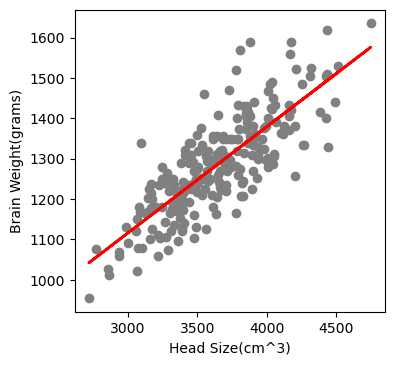

In [47]:
# realiza o plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(X_reshaped, y, color='gray')  # realiza o plot do gráfico de dispersão
plt.plot(X_reshaped, y_pred, color='red', linewidth=2)
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()

### Observações
- Definimos as variáveis de entrada X (Head Size(cm^3)) e de saída y (Brain Weight(grams))
- Criamos o objeto do modelo de regressão
- Passamos o X para 2D (reshape)
- Treinamos o modelo
- Realizamos a previsão
- Mostramos os parâmetros otimizados encontrados (coef_, intercept_)
- Criamos e mostramos as métricas de avaliação
    * Mean Abs Error:   56.3672
    * Mean Squ Error:   5201.384
    * Median Abs Error: 47.9697
    * Coef Determin R2: 0.6393
    * Coef Angular:    [0.26342934]
    * Coef Linear:      325.5734210494428
- Plotamos o gráfico

# Informações Sobre Regressão Linear

### O que é regressão linear?
- Um dos conceitos estatísticos mais utilizados dentro do machine learning
- A regressão linear é denominada dessa forma por ser uma reta traçada a partir de uma relação em um diagrama de dispersão.
- Essa reta resume uma relação entre os dados de duas variáveis e também pode ser utilizada para realizar previsões.
- Sua origem vem da correlação linear, que é a verificação da existência de um relacionamento entre duas variáveis. 
- Ou seja, dado X e Y, quanto que X explica Y. Para isso, a regressão linear utiliza os pontos de dados para encontrar a melhor linha de ajuste para modelar essa relação.
- O resultado da regressão linear é sempre um número. É utilizada adequadamente quando o dataset apresenta algum tipo de tendência de crescimento/descrescimento constante.
- A linha traçada pode ser representada pela equação, yi = α + ßXi + εi, onde y é a variável explicada (dependente) e representa o que o modelo tentará prever; α é a contante, representa a interceptação da reta com o eixo vertical; ß representa a inclinação em relação à variável explicativa; X é a variável explicativa (independente) e ε representa os valores residuais e possíveis erros.
- Dentro dessa equação, o algoritmo busca encontrar os valores para α e ß usando o conjunto de dados fornecido.
- Um exemplo de regressão linear é o Preço X Demanda. Se o preço varia, é esperado que a procura também oscile de acordo com essa mudança. Ou seja, se eu aumento o preço é esperado que a demanda diminua.
- Embora nem sempre ocorra um relação de causa e efeito, é uma forma de avaliar se duas grandezas variam concomitantemente. Essa relação pode ser direta, quando oscilam no mesmo sentido, ou inversa, quando oscilam em sentidos diferentes.

### Coeficiente de Correlação
- Para determinar se existe correlação entre duas variáveis é utilizado o coeficiente de correlação, também conhecido como coeficiente de Pearson ou coeficiente de determinação. Ele mede o grau da correlação e a direção dessa correlação (positiva ou negativa).
- Esse coeficiente atribui valores entre -1 e 1 para determinar o grau de correlação. Quando encontramos números próximos a 1, a correlação é considerada positiva. Já quando encontramos números próximos a -1 a correlação negativa.
- Quanto mais próximo dos extremos maior o grau de correlação e quanto mais próximo a zero menor o grau de correlação.
- Caso o resultado da equação seja 0,98 dizemos que a correlação entre as duas variáveis é de 98%.
- Portanto, devemos levar em conta o grau de correlação em nossas previsões. Geralmente acima de 70% consideramos uma correlação significativa.

### Gráfico de Regressão Linear
- Existem dois tipos de regressão linear: a simples, que utiliza apenas uma variável independente; e a múltipla, que utiliza mais de uma variável ​​independente.